In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Paths
cwd = os.path.join("..","..")
cwd_Images_Raw = os.path.join(cwd, "Sentinel-2 Images Raw")
cwd_Images_Processed = os.path.join(cwd, "Sentinel-2 Images Processed")
cwd_Images_Results = os.path.join(cwd, "Results")

In [3]:
df = pd.read_excel(os.path.join(cwd,"Results","Final (101 Sites) HI, Roman, Info.xlsx"), header=1)
df.head()

,Site,HI 100,HI 300,HI 600,HI 900,HI Total,STD 100,Mean 100,CV 100,Sill 100,...,Sill 300,STD 600,Mean 600,CV 600,Sill 600,STD 900,Mean 900,CV 900,Sill 900,Variogram Fitting
0,GHNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.280386,5.898007,0.047539,0.083282,...,0.090163,0.339874,5.938954,0.057228,0.114099,0.394323,5.943672,0.066343,0.150287,Good
1,KEN-KAP,0.000009,0.000054,0.000108,0.000073,0.000061,0.512046,13.112819,0.039049,0.256761,...,1.281788,1.284793,12.376468,0.103809,2.017366,1.313768,12.549636,0.104686,1.849329,Bad
2,AT-Mmg,0.000256,0.000093,0.000121,0.000133,0.000151,1.886267,31.809015,0.059300,3.316349,...,3.442307,1.914285,32.875859,0.058228,3.904039,2.187106,33.644299,0.065007,5.146960,Bad
3,Dahara (Senegal),0.000401,0.000117,0.000131,0.000094,0.000186,1.534155,12.907167,0.118861,2.613929,...,2.156830,1.451705,12.376944,0.117291,2.143269,1.450054,12.104871,0.119791,2.072566,Bad
4,SE-Svb,0.000637,0.000158,0.000393,0.000642,0.000458,2.092156,21.727341,0.096291,5.042184,...,3.705230,2.525609,22.287381,0.113320,6.435816,3.372941,23.119932,0.145889,10.917600,Good


In [6]:
df_HI = df.copy()
df_HI = df_HI[['Site','HI Total']]
df_HI.head()

,Site,HI Total
0,GHNA,0.000000
1,KEN-KAP,0.000061
2,AT-Mmg,0.000151
3,Dahara (Senegal),0.000186
4,SE-Svb,0.000458


Text(0, 0.5, 'Frequency')

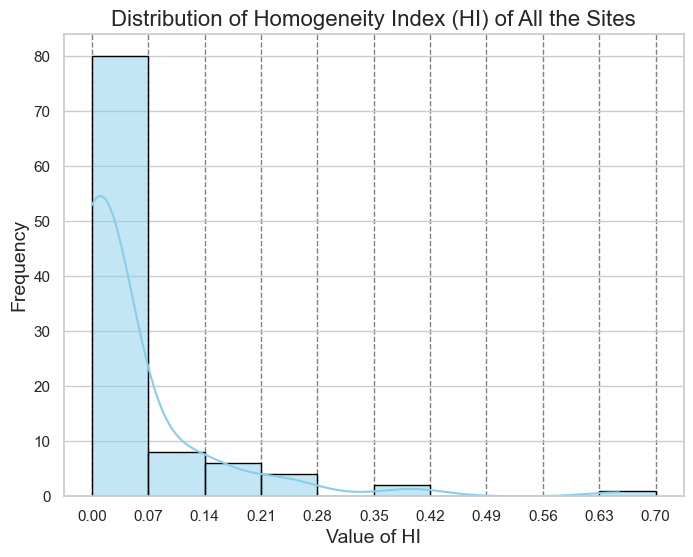

In [12]:
# Set the style for Seaborn
sns.set_theme(style="whitegrid")

# Create a histogram with specific bin edges
bin_edges = np.linspace(0, round(np.max(df_HI['HI Total'])/0.1)*0.1, 11)  # Define bin edges (e.g., 10 bins)

# Plot histogram with custom bin edges
plt.figure(figsize=(8, 6))
sns.histplot(df_HI['HI Total'], bins=bin_edges, kde=True, color='skyblue', edgecolor='black')

# Add grid
plt.grid(True, axis='x', linestyle='--', color='gray')

# Set x-ticks to correspond to bin edges
plt.xticks(bin_edges)

# Add labels and title
plt.title(f'Distribution of Homogeneity Index (HI) of All the Sites', fontsize=16)
plt.xlabel('Value of HI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

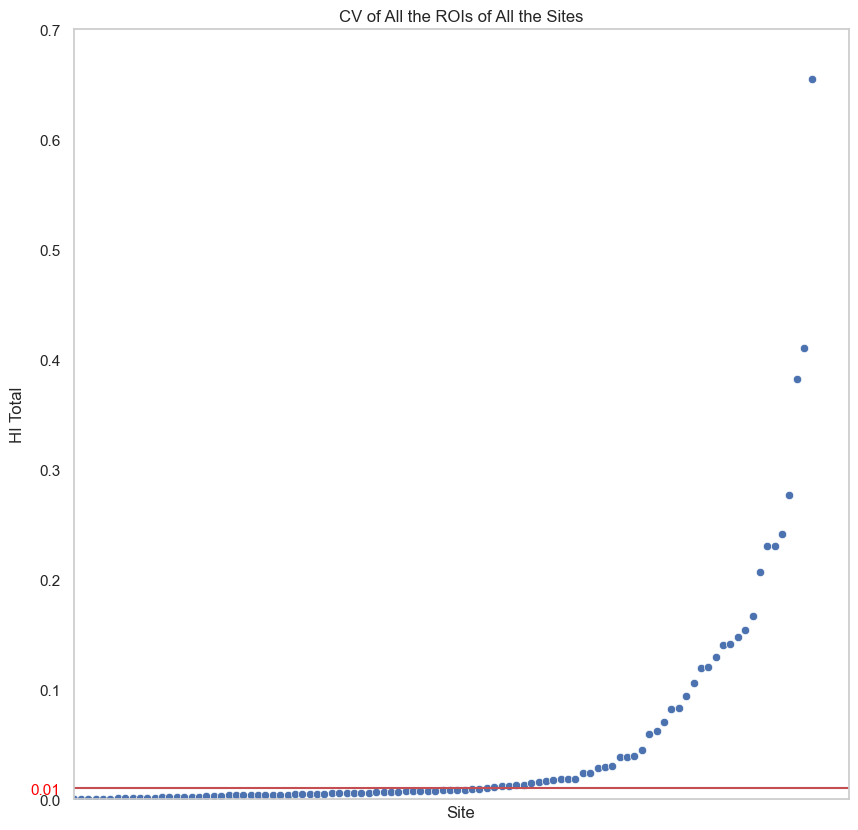

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set_theme(style="whitegrid")
plt.title("CV of All the ROIs of All the Sites")
sns.scatterplot(data=df_HI, x=np.arange(len(df_HI['Site'])), y="HI Total")
plt.axhline(y=0.01, color='r', linestyle='-')
plt.xticks([])
plt.yticks(list(plt.yticks()[0]) + [0.01], labels=list(plt.yticks()[1]) + ['0.01'])
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Site')
ax.yaxis.get_ticklabels()[-1].set_color('red')